# **Machine Learning Project**
## California House Price Prediction Model

#### *Presented By*:
##### 1. Jonathan Wilchield Arthur
##### 2. William Kpakpo Brown


### Loading Data

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('housing.csv')

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Cleaning Data

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [12]:
data.dropna(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [97]:
data.duplicated() 

0        False
1        False
2        False
3        False
4        False
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Length: 20433, dtype: bool

In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

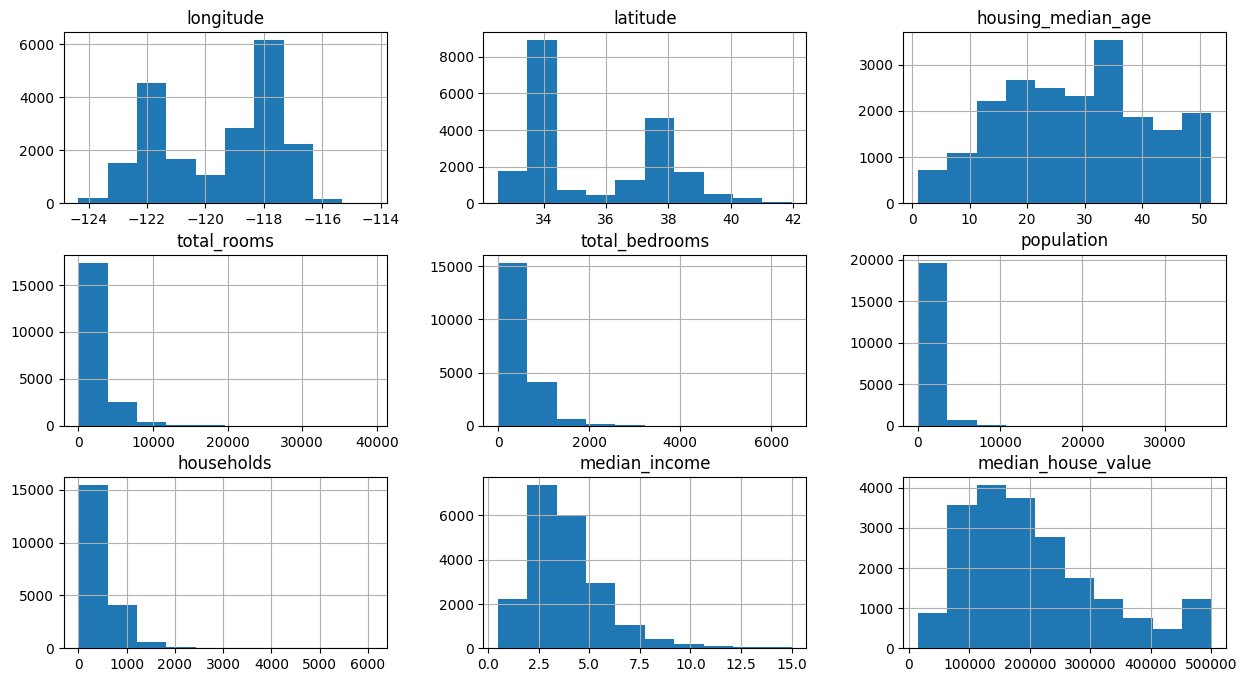

In [18]:
data.hist(figsize = (15,8))

In [20]:
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['total_bedrooms'] = np.log(data['total_bedrooms'] + 1)
data['population'] = np.log(data['population'] + 1)
data['households'] = np.log(data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

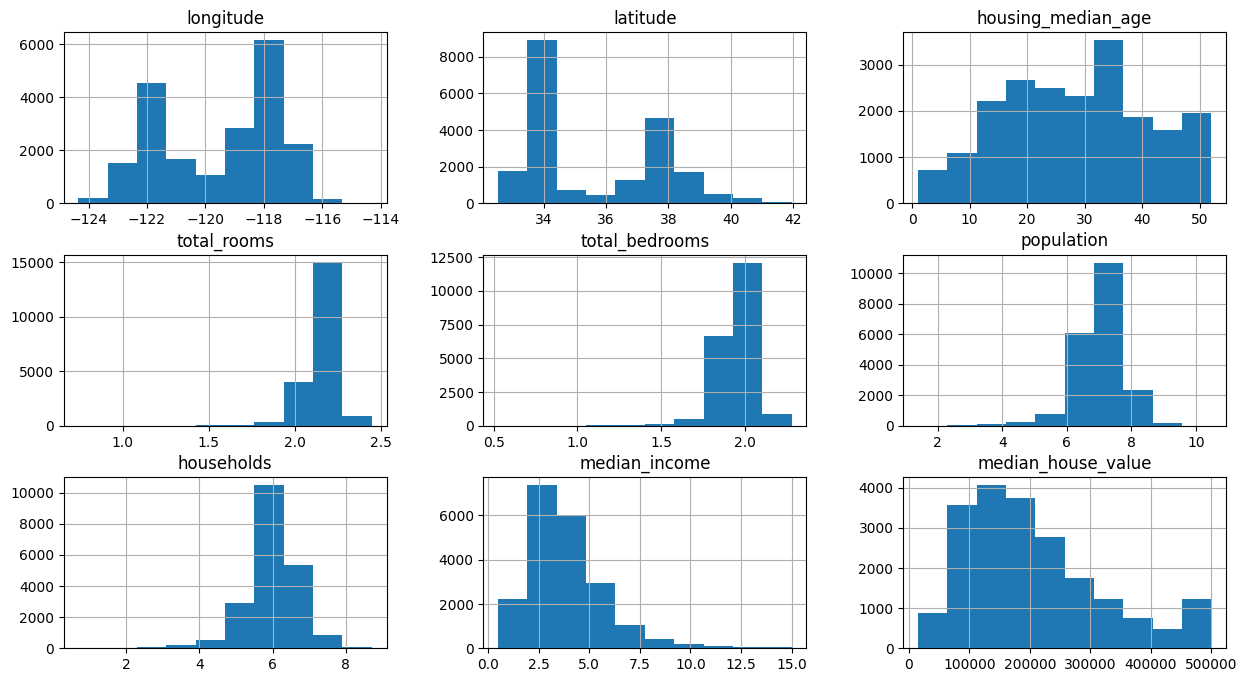

In [21]:
data.hist(figsize = (15, 8))

### Handling Categorical Data

In [25]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,2.051692,1.769435,5.777652,4.844187,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,2.289282,2.080617,7.784057,7.037906,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,2.115250,1.832945,6.208590,5.181784,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,2.098104,1.866222,6.326149,5.393628,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,2.127649,1.892864,6.338594,5.560682,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2.130394,1.935416,6.740519,5.802118,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,2.021312,1.794635,5.877736,4.744932,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2.165723,1.972164,6.915723,6.073045,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,2.143457,1.948216,6.609349,5.857933,1.8672,84700.0,INLAND


In [26]:
data = data.join(pd.get_dummies(data.ocean_proximity, dtype=int)).drop(['ocean_proximity'], axis = 1)

In [27]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,2.051692,1.769435,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,2.289282,2.080617,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,2.115250,1.832945,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,2.098104,1.866222,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,2.127649,1.892864,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2.130394,1.935416,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,2.021312,1.794635,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2.165723,1.972164,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,2.143457,1.948216,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


### Feature Extraction

<Axes: >

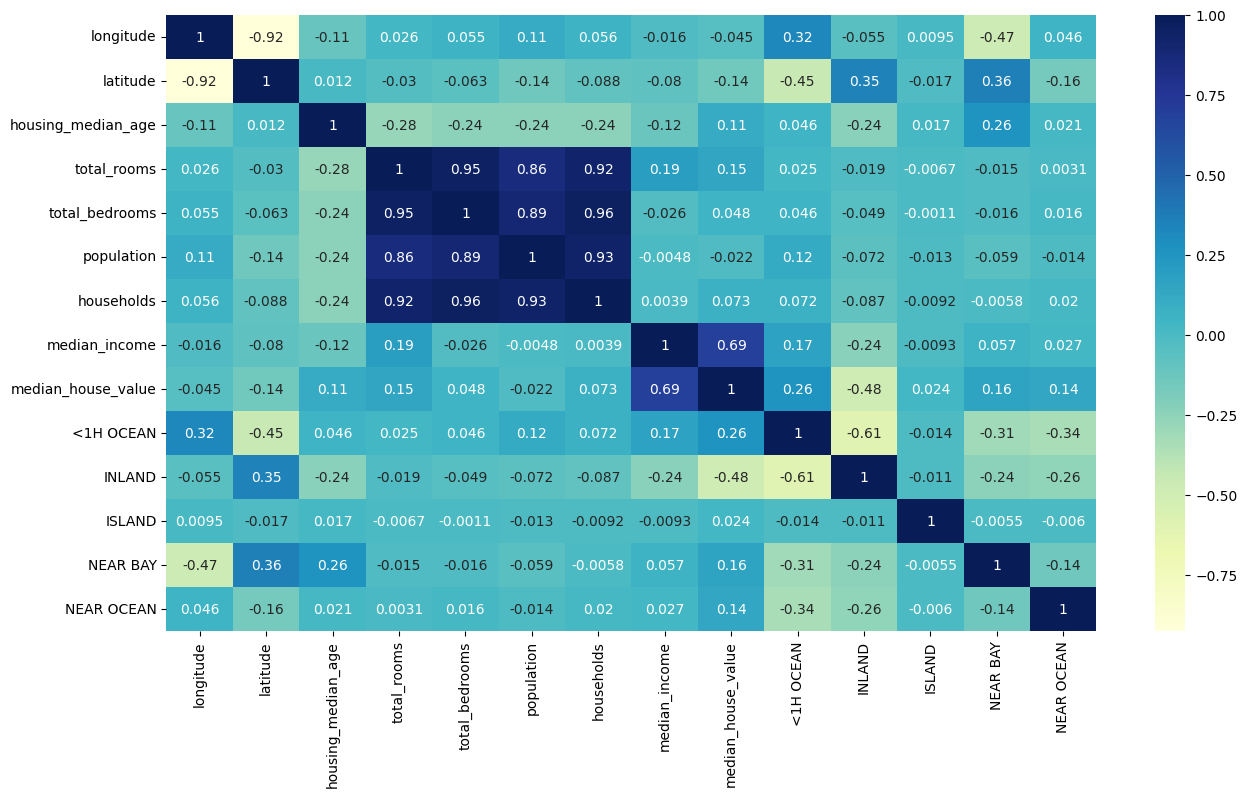

In [29]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [32]:
data['bedroom_ratio'] = data['total_rooms'] / data['total_bedrooms']
data['room_ratio'] = data['total_rooms'] / data['households']

In [33]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,room_ratio
0,-122.23,37.88,41.0,2.051692,1.769435,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,1.159519,0.423537
1,-122.22,37.86,21.0,2.289282,2.080617,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,1.100290,0.325279
2,-122.24,37.85,52.0,2.115250,1.832945,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,1.154017,0.408209
3,-122.25,37.85,52.0,2.098104,1.866222,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,1.124252,0.388997
4,-122.25,37.85,52.0,2.127649,1.892864,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,1.124037,0.382624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,2.130394,1.935416,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,1.100742,0.367175
20636,-121.21,39.49,18.0,2.021312,1.794635,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,1.126308,0.425994
20637,-121.22,39.43,17.0,2.165723,1.972164,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,1.098146,0.356612
20638,-121.32,39.43,18.0,2.143457,1.948216,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,1.100215,0.365907


<Axes: >

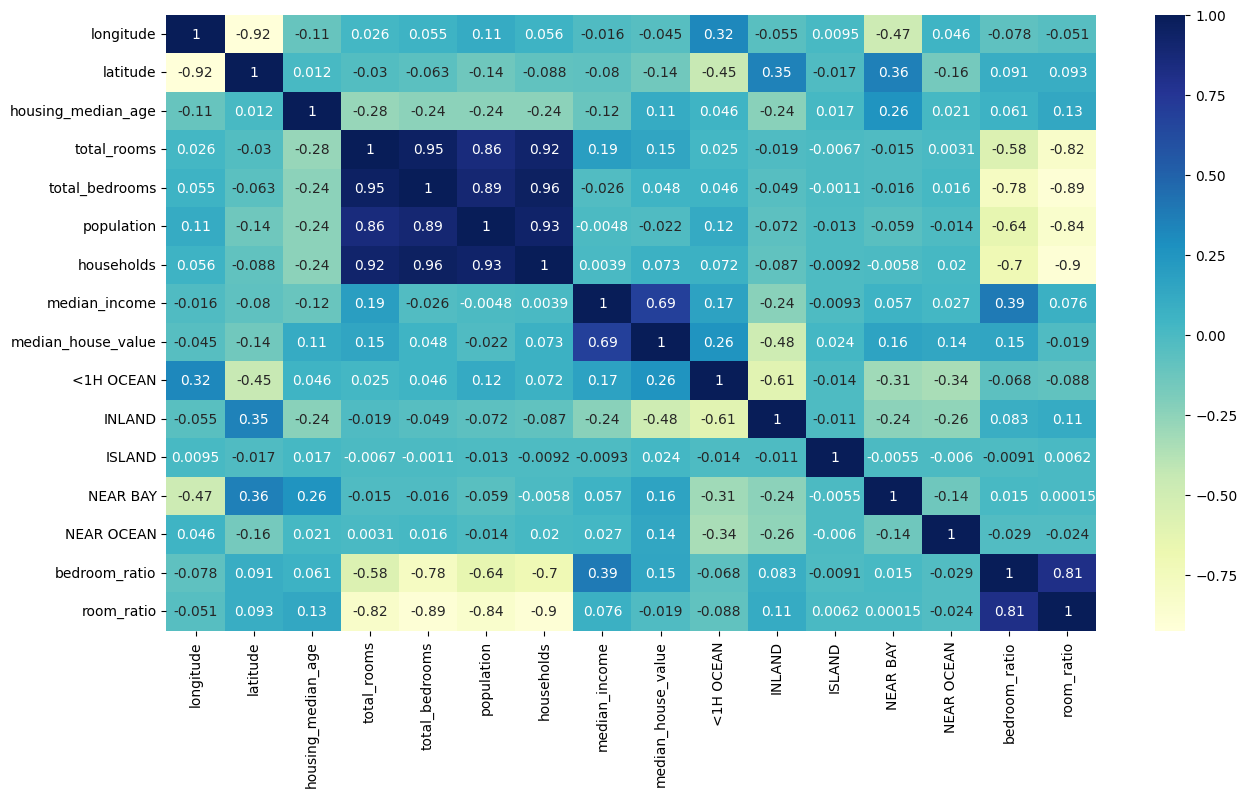

In [34]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [35]:
data.drop(['ISLAND'], axis = 1, inplace=True)
data.drop(['longitude'], axis = 1, inplace=True)

In [36]:
data

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,room_ratio
0,37.88,41.0,2.051692,1.769435,5.777652,4.844187,8.3252,452600.0,0,0,1,0,1.159519,0.423537
1,37.86,21.0,2.289282,2.080617,7.784057,7.037906,8.3014,358500.0,0,0,1,0,1.100290,0.325279
2,37.85,52.0,2.115250,1.832945,6.208590,5.181784,7.2574,352100.0,0,0,1,0,1.154017,0.408209
3,37.85,52.0,2.098104,1.866222,6.326149,5.393628,5.6431,341300.0,0,0,1,0,1.124252,0.388997
4,37.85,52.0,2.127649,1.892864,6.338594,5.560682,3.8462,342200.0,0,0,1,0,1.124037,0.382624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,39.48,25.0,2.130394,1.935416,6.740519,5.802118,1.5603,78100.0,0,1,0,0,1.100742,0.367175
20636,39.49,18.0,2.021312,1.794635,5.877736,4.744932,2.5568,77100.0,0,1,0,0,1.126308,0.425994
20637,39.43,17.0,2.165723,1.972164,6.915723,6.073045,1.7000,92300.0,0,1,0,0,1.098146,0.356612
20638,39.43,18.0,2.143457,1.948216,6.609349,5.857933,1.8672,84700.0,0,1,0,0,1.100215,0.365907


<Axes: >

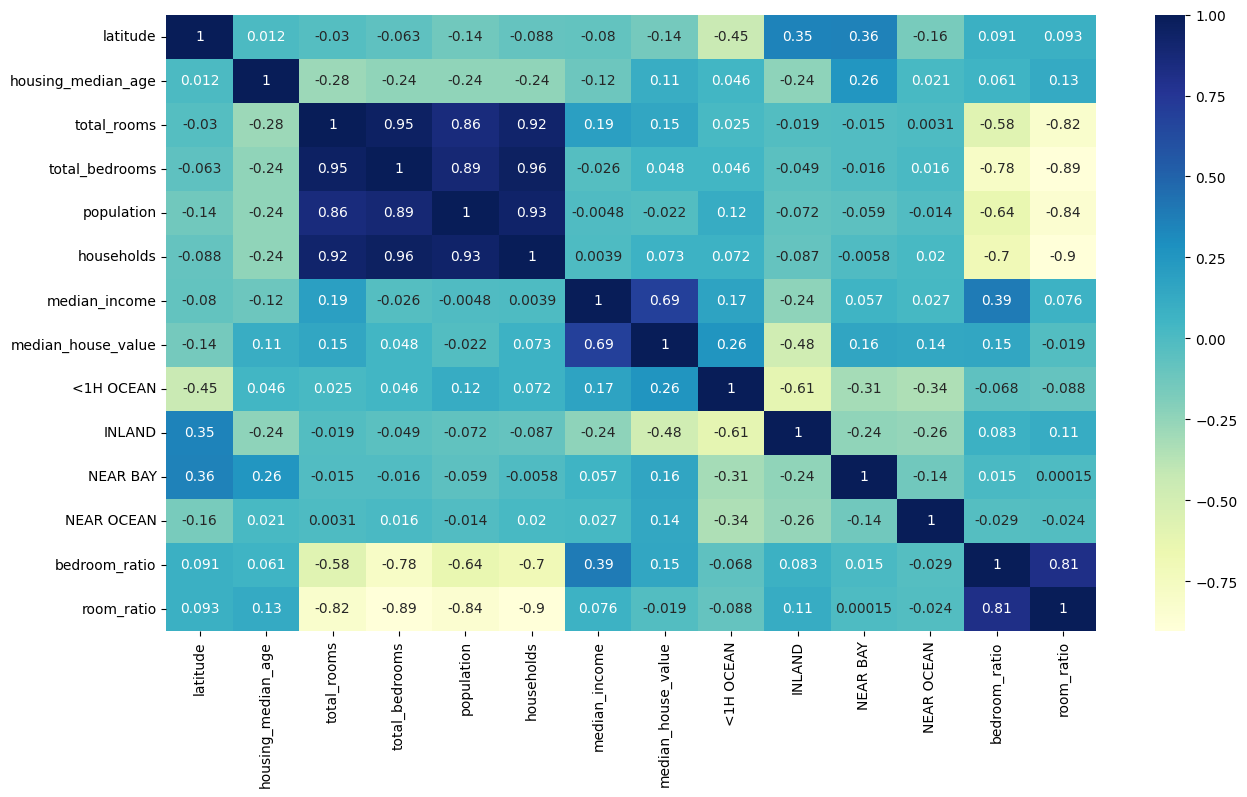

In [37]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

### Splitting Data into Train and Test Set

In [39]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
Y = data['median_house_value']

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [46]:
x_test

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,room_ratio
1582,37.86,18.0,2.312521,2.076948,8.010360,6.901737,10.7372,1,0,0,0,1.113423,0.335064
13651,34.05,6.0,2.293794,2.158182,8.317033,7.489971,2.7002,0,1,0,0,1.062836,0.306249
19539,37.65,34.0,2.132860,1.914994,6.880384,5.789960,2.4485,0,1,0,0,1.113769,0.368372
6211,34.07,35.0,2.044777,1.779561,5.973810,4.820282,4.5179,1,0,0,0,1.149034,0.424203
16393,38.04,42.0,1.922882,1.595709,4.762174,3.912023,5.5376,0,1,0,0,1.205033,0.491531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,33.98,38.0,2.143583,1.912253,6.883463,5.723585,4.7266,1,0,0,0,1.120972,0.374517
5280,34.05,48.0,2.218696,1.983892,7.156956,6.248043,9.5221,1,0,0,0,1.118355,0.355103
4257,34.10,24.0,2.262648,2.139803,7.959975,7.470794,1.8450,1,0,0,0,1.057409,0.302866
14793,32.57,35.0,2.113844,1.879324,6.836259,5.659482,2.6715,0,0,0,1,1.124790,0.373505


In [58]:
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

In [60]:
train_data

,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,room_ratio,median_house_value
6795,34.08,24.0,2.229078,2.079711,7.975908,6.942157,2.7036,1,0,0,0,1.071821,0.321093,170000.0
13146,38.19,36.0,2.109166,1.883994,6.552508,5.501258,2.4353,0,1,0,0,1.119519,0.383397,162500.0
13753,34.05,24.0,2.193311,1.978306,7.040536,6.163315,4.2059,0,1,0,0,1.108682,0.355866,121500.0
1823,37.93,34.0,2.165723,1.928696,6.573680,5.726848,4.5000,0,0,1,0,1.122895,0.378170,304000.0
5225,33.93,40.0,2.064767,1.887391,6.974479,5.602119,0.9889,1,0,0,0,1.093980,0.368569,87500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17036,37.50,45.0,2.140388,1.919872,6.624065,5.799093,4.9500,0,0,0,1,1.114860,0.369090,345000.0
3282,39.09,20.0,2.139476,1.943252,6.530878,5.805135,1.6250,0,1,0,0,1.100977,0.368549,66800.0
9613,37.29,17.0,2.166331,2.020550,8.071219,6.499787,1.5635,0,1,0,0,1.072149,0.333293,60400.0
4679,34.07,52.0,2.127209,1.894991,6.378426,5.609472,6.2223,1,0,0,0,1.122543,0.379217,500001.0


### Training and Testing with Models

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

scaler = StandardScaler()
reg_model = LinearRegression()
forest_model = RandomForestRegressor()
decision_tree_model = DecisionTreeRegressor

In [73]:
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.fit_transform(x_test)

In [69]:
reg_model.fit(x_train_s, y_train)
reg_model.score(x_train_s, y_train)

0.6525457284919591

In [70]:
reg_model.fit(x_test_s, y_test)
reg_model.score(x_test_s, y_test)

0.6730314573249726

In [81]:
forest_model.fit(x_train_s, y_train)
forest_model.score(x_train_s, y_train)

0.9657360196525918

In [82]:
forest_model.fit(x_test_s, y_test)
forest_model.score(x_test_s, y_test)

0.9623156562575325

In [85]:
decision_tree_model.fit(x_train_s, y_train)
decision_tree_model.score(x_train_s, y_train)

1.0

In [87]:
decision_tree_model.fit(x_test_s, y_test)
decision_tree_model.score(x_test_s, y_test)

1.0

#### *This concludes our model*
#### *Thank You*